In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read BGI input

In [32]:
# input BGI 
bgi = pd.read_csv('input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
# inpu Illumina
ill = pd.read_csv('input/ReadsNumb_FS.csv')
ill.rename(columns={"nameS": "sample_name", "reads_numb": "Illumina_reads_numb"}, inplace=True)
# merge
rn = bgi.merge(ill, on='sample_name', how='outer')
rn.to_excel('results/ReadsNumb_both_sets.xlsx', index=False)

rn.head()

,BGI_reads_file,BGI_reads_numb,sample_name,Illumina_reads_numb
0,lab20_V3276M_E100013465_L01,109810982.0,V3276M,14811940.0
1,lab20_V32MIP_E100009727_L01,102273989.0,V32MIP,14588729.0
2,lab20_V40FOF_E100009887_L01,108961838.0,V40FOF,14779800.0
3,lab20_V412BS_E100013104_L01,110272626.0,V412BS,16672245.0
4,lab20_V4L9I1_E100013465_L01,110242066.0,V4L9I1,15203668.0


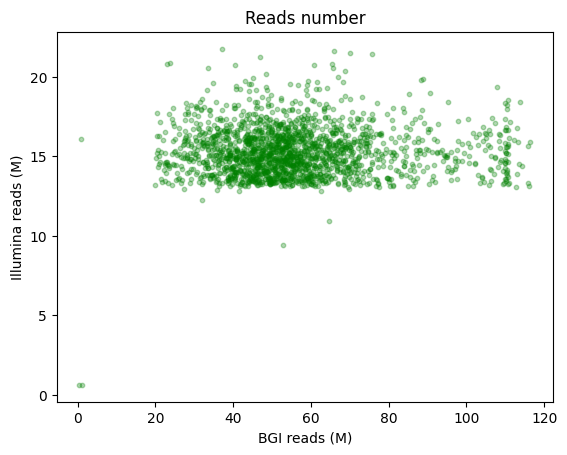

In [40]:
plt.scatter(rn['BGI_reads_numb']/1000000, rn['Illumina_reads_numb']/1000000, s=10, c='green', alpha=0.3)
plt.xlabel('BGI reads (M)')
plt.ylabel('Illumina reads (M)')
plt.title('Reads number')
plt.savefig('results/ReadsNumb_both_sets.png', dpi=300)

In [57]:
#meta = pd.read_excel('input/MataData.xlsx')
meta = meta[['skood', 'gender', 'Age_at_MBsample', 'BMI', 'WHR','samplingSeason', 'BP_systolic', 'birthPlace_typeCity','seasonableAllergy_code',
             'sensitivityGlutenSubject_code','sensitivityLactoseSubject_code','hasPets','alcohol_has_used','has_smoked_lastYear',
             'doesPhysicalExercise','mental_health_status_ok','health_status_ok','antibiotics_history_cont','antidepressants_history_cont']]

sv = pd.read_excel('input/scode_vcode.xlsx')
meta = meta.merge(sv, on='skood', how='left')
meta.to_excel('results/meta.xlsx', index=False)

meta.head()

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic,birthPlace_typeCity,seasonableAllergy_code,sensitivityGlutenSubject_code,sensitivityLactoseSubject_code,hasPets,alcohol_has_used,has_smoked_lastYear,doesPhysicalExercise,mental_health_status_ok,health_status_ok,antibiotics_history_cont,antidepressants_history_cont,vkood
0,EGVD049674,1,35.0,20.24,0.72,Spring,112.0,1.0,1.0,4.0,4.0,0.0,1.0,NaN,1,1,1,0.0,0.0,VT2F0R
1,EGVD046120,1,36.0,18.89,0.75,Spring,118.0,1.0,2.0,4.0,4.0,0.0,1.0,NaN,1,1,1,6.0,0.0,V6QVQM
2,EGVD004311,1,59.0,32.79,0.85,Winter,169.0,1.0,2.0,4.0,4.0,1.0,1.0,NaN,1,1,0,NaN,0.0,VB6RZH
3,EGVD027494,0,77.0,24.98,0.94,Winter,138.0,0.0,2.0,1.0,1.0,1.0,1.0,NaN,1,0,0,NaN,NaN,VE954R
4,EGVD026699,1,74.0,26.09,0.77,Winter,171.0,0.0,2.0,5.0,4.0,1.0,1.0,NaN,0,1,1,NaN,NaN,VY9T1U


In [42]:
meta.head()

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic,birthPlace_typeCity,seasonableAllergy_code,sensitivityGlutenSubject_code,...,seasonableAllergy,hasPets,alcohol_has_used,has_smoked_lastYear,doesPhysicalExercise,mental_health_status_ok,health_status_ok,antibiotics_history_cont,antidepressants_history_cont,vkood
0,EGVD049674,1,35.0,20.24,0.72,Spring,112.0,1.0,1.0,4.0,...,1.0,0.0,1.0,NaN,1,1,1,0.0,0.0,VT2F0R
1,EGVD046120,1,36.0,18.89,0.75,Spring,118.0,1.0,2.0,4.0,...,0.0,0.0,1.0,NaN,1,1,1,6.0,0.0,V6QVQM
2,EGVD004311,1,59.0,32.79,0.85,Winter,169.0,1.0,2.0,4.0,...,0.0,1.0,1.0,NaN,1,1,0,NaN,0.0,VB6RZH
3,EGVD027494,0,77.0,24.98,0.94,Winter,138.0,0.0,2.0,1.0,...,0.0,1.0,1.0,NaN,1,0,0,NaN,NaN,VE954R
4,EGVD026699,1,74.0,26.09,0.77,Winter,171.0,0.0,2.0,5.0,...,0.0,1.0,1.0,NaN,0,1,1,NaN,NaN,VY9T1U


In [58]:
# merge meta and rn
mrg = meta.merge(rn, left_on='vkood', right_on='sample_name', how='outer')
mrg.to_excel('results/meta_rn.xlsx', index=False)

mrg.head()

,skood,gender,Age_at_MBsample,BMI,WHR,samplingSeason,BP_systolic,birthPlace_typeCity,seasonableAllergy_code,sensitivityGlutenSubject_code,...,doesPhysicalExercise,mental_health_status_ok,health_status_ok,antibiotics_history_cont,antidepressants_history_cont,vkood,BGI_reads_file,BGI_reads_numb,sample_name,Illumina_reads_numb
0,EGVD049674,1.0,35.0,20.24,0.72,Spring,112.0,1.0,1.0,4.0,...,1.0,1.0,1.0,0.0,0.0,VT2F0R,lab70_VT2F0R_E100015864_L01,47536515.0,VT2F0R,15317512.0
1,EGVD046120,1.0,36.0,18.89,0.75,Spring,118.0,1.0,2.0,4.0,...,1.0,1.0,1.0,6.0,0.0,V6QVQM,lab67_V6QVQM_E100013118_L01,45478740.0,V6QVQM,13457131.0
2,EGVD004311,1.0,59.0,32.79,0.85,Winter,169.0,1.0,2.0,4.0,...,1.0,1.0,0.0,NaN,0.0,VB6RZH,lab64_VB6RZH_E100013100_L01,41392782.0,VB6RZH,15033056.0
3,EGVD027494,0.0,77.0,24.98,0.94,Winter,138.0,0.0,2.0,1.0,...,1.0,0.0,0.0,NaN,NaN,VE954R,lab64_VE954R_E100009727_L01,27135157.0,VE954R,15749787.0
4,EGVD026699,1.0,74.0,26.09,0.77,Winter,171.0,0.0,2.0,5.0,...,0.0,1.0,1.0,NaN,NaN,VY9T1U,NaN,NaN,VY9T1U,14425150.0


In [59]:
mrg.aggregate(['count','nunique']).T

,count,nunique
skood,2637,2509
gender,2637,2
Age_at_MBsample,2619,67
BMI,2634,1359
WHR,2633,53
samplingSeason,2619,4
BP_systolic,2603,109
birthPlace_typeCity,2591,2
seasonableAllergy_code,2632,3
sensitivityGlutenSubject_code,2633,5


In [56]:
mrg['gender'].value_counts()

1.0    1765
0.0     808
Name: gender, dtype: int64

## Selecte 100 samples with similar reads number in between platform

In [89]:
mrg_sel = mrg[['BGI_reads_numb', 'sample_name','Illumina_reads_numb','gender','BMI']]
mrg_sel['diff'] = mrg_sel['BGI_reads_numb']/1000000 - mrg_sel['Illumina_reads_numb']/1000000
mrg_sel = mrg_sel[mrg_sel['diff'] > 2]
mrg_sel = mrg_sel[mrg_sel['Illumina_reads_numb'] > 12000000]
pb = mrg_sel.sort_values(by='Illumina_reads_numb', ascending=True).head(100)

pb.tail(10)


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17899/812119796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrg_sel['diff'] = mrg_sel['BGI_reads_numb']/1000000 - mrg_sel['Illumina_reads_numb']/1000000


,BGI_reads_numb,sample_name,Illumina_reads_numb,gender,BMI,diff
2325,46676285.0,VC0JIV,13363347.0,1.0,22.70,33.312938
837,49265325.0,V8XI8Q,13367320.0,1.0,26.73,35.898005
267,32340815.0,VOFI2M,13369666.0,1.0,26.09,18.971149
2375,47041891.0,VCJHL2,13371362.0,1.0,36.57,33.670529
183,51310207.0,VLC38X,13373255.0,1.0,23.36,37.936952
954,47549286.0,VNFOKA,13375283.0,0.0,23.55,34.174003
1559,80001440.0,V1C5D9,13380903.0,1.0,22.05,66.620537
691,45742307.0,VP8ZEE,13381818.0,1.0,19.46,32.360489
2141,43967805.0,V4IZWO,13383075.0,1.0,29.76,30.584730
1736,51061364.0,V8RU1D,13385504.0,0.0,28.86,37.675860


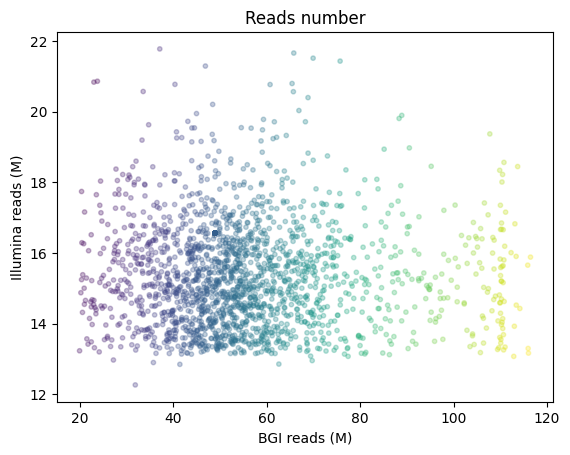

In [98]:
plt.scatter(mrg_sel['BGI_reads_numb']/1000000, mrg_sel['Illumina_reads_numb']/1000000, s=10, c=mrg_sel['diff'], alpha=0.3)
plt.xlabel('BGI reads (M)')
plt.ylabel('Illumina reads (M)')
plt.title('Reads number')
plt.savefig('results/ReadsNumb_both_sets_diff.png', dpi=300)

In [100]:
pb['gender'].value_counts()
#plt.pie(pb['gender'].value_counts())

1.0    68
0.0    32
Name: gender, dtype: int64

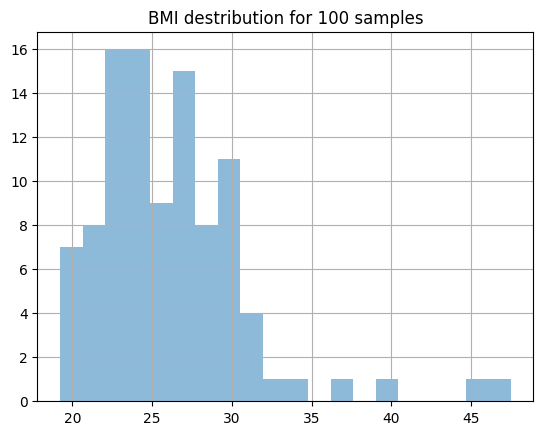

In [101]:
pb['BMI'].hist(bins=20, alpha=0.5)
plt.title('BMI destribution for 100 samples')

plt.savefig('results/100_BMI.png', dpi=300)

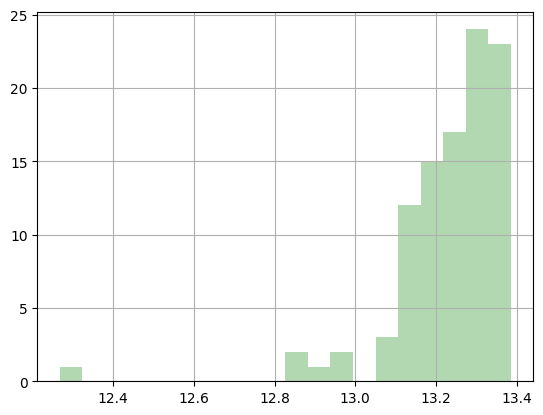

In [103]:
(pb['Illumina_reads_numb']/1000000).hist(bins=20, alpha=0.3, color='green')
#plt.title('BMI destribution for 100 samples')

plt.savefig('results/100_Illumina_reads_numb.png', dpi=300)

## Plots to play

!! Need to selete the samples for case/conrols group first

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17899/2461672155.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mrg.corr()


<Axes: >

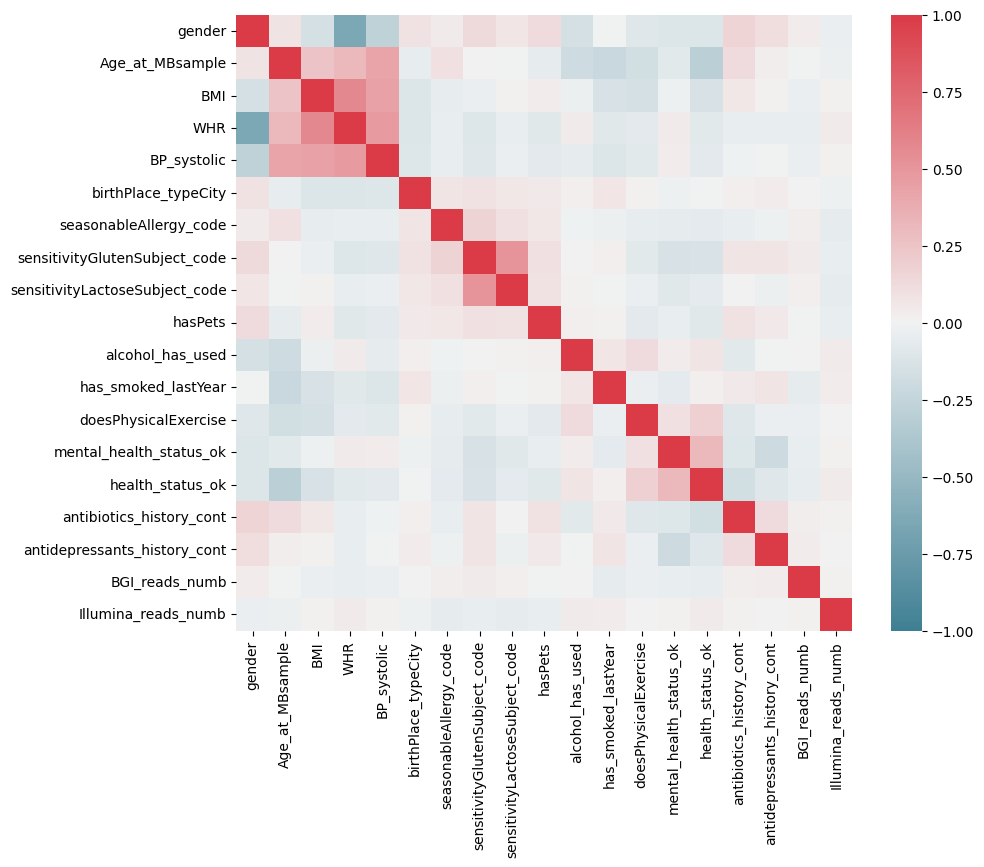

In [60]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = mrg.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Text(0, 0.5, 'Age_at_MBsample')

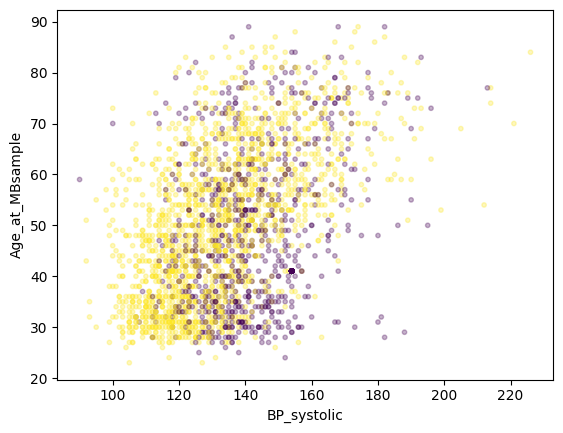

In [69]:
plt.scatter(mrg['BP_systolic'], mrg['Age_at_MBsample'], s=10, c=mrg['gender'], alpha=0.3)
plt.xlabel('BP_systolic')
plt.ylabel('Age_at_MBsample')

#plt.title('Reads number')
#plt.savefig('results/ReadsNumb_both_sets.png', dpi=300)